<h1 style='color:blue;'>SUMMER ANALYTICS 2020<br><span style='color:red;'>Week 4</span></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt

It is highly recommended to read the documentation before implementing any alogorithm.

LINEAR REGRESSION : 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
LOGISTIC REGRESSION :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
SVM REGRESSOR :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html<br>
SVM CLASSIFIER :
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
DECISION TREE CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
DECISION TREE Regressor :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>
RANDOM FOREST CLASSIFIER :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
RANDOM FOREST REGRESSOR :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

METRICS:
R2_SCORE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html<br>
MSE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html<br>
MAE : http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html<br>
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br>

WRITE THE CODE FOR IMPORTING THE DATA

In [2]:
#WRITE CODE HERE IMPORT THE DATA AS 'data'
data=pd.read_csv('WEEK4.csv')

ONE HOT ENCODING THE COLOR COLUMN AND THEN DROPPING THE COLOR COLUMN

In [3]:
#ONE HOT ENCODING THE COLOR COLUMN
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)

In [4]:
# VIEWING THE DATA ONCE
data

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,7800,2019,23609.0,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2149,9200,2018,34553.0,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2150,9200,2018,31594.0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2151,9200,2018,32557.0,2,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


WE USE THE train_test_split_function TO SPLIT THE DATA INTO TRAIN AND TEST <br>
HERE WE IMPORT IT FROM SKLEARN

In [5]:
from sklearn.model_selection import train_test_split as tts

LET US LOOK AT THE PRICES DISTRIBUTION

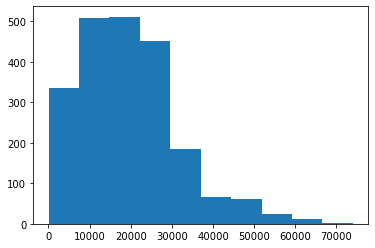

In [6]:
plt.hist(data['price']);

IT IS LEFT-SKEWED, WE HAVE LEARNT HOW TO HANDLE SKEWED DATA<br>
We will either use log transform or sqrt transform

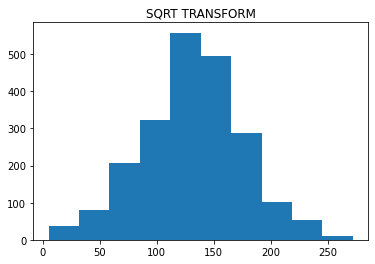

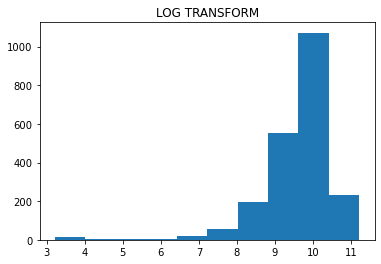

In [7]:
#WE HAVE WRITTEN THE CODE FOR PLOTTING THE HISTOGRAM FOR THE LOG-TRANSFORMED PRICE COLUMN AND SQRT TRANSFORMED SQRT COLUMN.
plt.hist(np.sqrt(data['price']));
plt.title('SQRT TRANSFORM');
plt.show()
plt.hist(np.log(data['price']));
plt.title('LOG TRANSFORM');
plt.show()

CLEARLY SQRT TRANSFORM IS BETTER

In [8]:
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [9]:
# HERE WE SPLIT DATA INTO TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [10]:
#LET US PRINT THE SHAPES
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('\nExpected shapes')
print((1722, 25))
print((431, 25))
print((1722,))
print((431,))
print('\nVerify if they are matching')

(1722, 25)
(431, 25)
(1722,)
(431,)

Expected shapes
(1722, 25)
(431, 25)
(1722,)
(431,)

Verify if they are matching


NOW <br>
LET US APPLY LINEAR REGRESSION ON THE DATA, THIS TIME WE WILL IMPORT IT FROM SKLEARN <br>


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
# INITIALIZE LINEAR REGRESSION WITH ALL DEFAULT PARAMETERS
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)

# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(Linreg.predict(X_test)))))

# WRITE CODE FOR MEAN SQUARE ERROR AND MEAN

# Start code
print("Linear Regression Training mean_square_error is " + str(mean_squared_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_square_error is " + str(mean_squared_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
print("Linear Regression Training mean_absolute_error is " + str(mean_absolute_error(np.square(y_train),np.square(Linreg.predict(X_train)))))
print("Linear Regression Testing mean_absolute_error is " + str(mean_absolute_error(np.square(y_test),np.square(Linreg.predict(X_test)))))
# End code
print("\n")
print("The correct values are :")
print('Linear Regression Training R2 score is 0.3577935806672855')
print('Linear Regression Testing R2 score is 0.33405970134102436')
print('Linear Regression Training mean_square_error is 90997459.24038002')
print('Linear Regression Testing mean_square_error is 93998879.06677869')
print('Linear Regression Training mean_absolute_error is 6864.980505017769')
print('Linear Regression Testing mean_absolute_error is 6926.987292556893')

print("\nPlease verify if you have got the same values")

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410348
Linear Regression Training mean_square_error is 90997459.24037871
Linear Regression Testing mean_square_error is 93998879.06677723
Linear Regression Training mean_absolute_error is 6864.98050501778
Linear Regression Testing mean_absolute_error is 6926.987292556907


The correct values are :
Linear Regression Training R2 score is 0.3577935806672855
Linear Regression Testing R2 score is 0.33405970134102436
Linear Regression Training mean_square_error is 90997459.24038002
Linear Regression Testing mean_square_error is 93998879.06677869
Linear Regression Training mean_absolute_error is 6864.980505017769
Linear Regression Testing mean_absolute_error is 6926.987292556893

Please verify if you have got the same values


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF DECISION TREE IN REGRESSION <br>

In [12]:
from sklearn.tree import DecisionTreeRegressor

# INITIALIZE THE DECISION TREE WITH criterion as mse, max depth as 7 and Random State as 1
regressor = DecisionTreeRegressor(criterion='mse',max_depth=7,random_state=1)
# USE THE FIT METHOD TO FIND THE R2_SCORE, MSE, MAE For training as well as testing data
regressor.fit(X_train,y_train)
# START CODE
print("DecisionTree Training R2 score is " + str(r2_score(np.square(y_train),np.square(regressor.predict(X_train)))))
print("DecisionTree Testing R2 score is " + str(r2_score(np.square(y_test),np.square(regressor.predict(X_test)))))
print("DecisionTree Training mse is " + str(mean_squared_error(np.square(y_train),np.square(regressor.predict(X_train)))))
print("DecisionTree Testing mse is " + str(mean_squared_error(np.square(y_test),np.square(regressor.predict(X_test)))))
print("DecisionTree Training mae is " + str(mean_absolute_error(np.square(y_train),np.square(regressor.predict(X_train)))))
print("DecisionTree Testing mae is " + str(mean_absolute_error(np.square(y_test),np.square(regressor.predict(X_test)))))
# END CODE

DecisionTree Training R2 score is 0.422869230755335
DecisionTree Testing R2 score is 0.36145560633416207
DecisionTree Training mse is 81776562.90835412
DecisionTree Testing mse is 90131889.2396716
DecisionTree Training mae is 6266.244817595775
DecisionTree Testing mae is 6846.025816839579


<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF SVM IN REGRESSION <br>

In [13]:
from sklearn.svm import SVR
# INITIALIZE THE SVM WITH kernel as 'poly', maximum number of iterations as 3000, degree as 2, C(regularization parameter) as 0.1 
svmreg=SVR(kernel='poly',max_iter=3000,degree=2,C=0.1)
# FIT THE DATA using FIT METHOD
svmreg.fit(X_train,y_train)
# Calculate the R2_score, mse, mae for training data as well as testing data.
print("SVM Training R2 score is " + str(r2_score(np.square(y_train),np.square(svmreg.predict(X_train)))))
print("SVM Testing R2 score is " + str(r2_score(np.square(y_test),np.square(svmreg.predict(X_test)))))
print("SVM Training mse is " + str(mean_squared_error(np.square(y_train),np.square(svmreg.predict(X_train)))))
print("SVM Testing mse is " + str(mean_squared_error(np.square(y_test),np.square(svmreg.predict(X_test)))))
print("SVM Training mae is " + str(mean_absolute_error(np.square(y_train),np.square(svmreg.predict(X_train)))))
print("SVM Testing mae is " + str(mean_absolute_error(np.square(y_test),np.square(svmreg.predict(X_test)))))
# START CODE

# END CODE

SVM Training R2 score is -21.378337117720697
SVM Testing R2 score is 0.0879391173112708
SVM Training mse is 3170899197.5713468
SVM Testing mse is 128739319.10418974
SVM Training mae is 9831.444528754593
SVM Testing mae is 8348.703212635415


YOU MIGHT SEE WORSE VALUES WHEN COMPARED TO LINEAR REGRESSION OR DECISION TREE AS THE DATA IS UNSCALED AND SVM REQUIRES MUCH MORE PREPROCESSING AND TUNING...BUT WE WON'T DO THAT HERE AS OUR AIM WAS JUST TO IMPLEMENT THE MODELS

<br>
NOW LET US WRITE THE SKLEARN IMPLEMENTATION OF Random Forest IN REGRESSION <br>

In [14]:
from sklearn.ensemble import RandomForestRegressor
# INITIALIZE THE Random Forest Regressor WITH no: of trees as 200, max_depth as 9, n_jobs as -1(read documentation for more details) and random state as 1 
rfreg = RandomForestRegressor(n_estimators=200,max_depth=9,n_jobs=-1,random_state=1)
# FIT THE DATA using FIT METHOD
rfreg.fit(X_train,y_train)
# Calculate the R2_score, mse, mae for training data as well as testing data.
print("Random Forest Training R2 score is " + str(r2_score(np.square(y_train),np.square(rfreg.predict(X_train)))))
print("Random Forest Testing R2 score is " + str(r2_score(np.square(y_test),np.square(rfreg.predict(X_test)))))
print("Random Forest Training mse is " + str(mean_squared_error(np.square(y_train),np.square(rfreg.predict(X_train)))))
print("Random Forest Testing mse is " + str(mean_squared_error(np.square(y_test),np.square(rfreg.predict(X_test)))))
print("Random Forest Training mae is " + str(mean_absolute_error(np.square(y_train),np.square(rfreg.predict(X_train)))))
print("Random Forest Testing mae is " + str(mean_absolute_error(np.square(y_test),np.square(rfreg.predict(X_test)))))
# START CODE

# END CODE

Random Forest Training R2 score is 0.5524364393379151
Random Forest Testing R2 score is 0.3997413290406362
Random Forest Training mse is 63417533.12143005
Random Forest Testing mse is 84727778.65210526
Random Forest Training mae is 5528.669046457424
Random Forest Testing mae is 6695.668840563839


NOW FOR CLASSIFICATION MODELS WE NEED TO CONVERT THE TARGET VARIABLE INTO DIFFERENT CLASSES

In [15]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's <br>
WE HAVE CHOSEN THRESHOLD AT price = 20000

In [16]:
data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1

In [17]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [41]:
X_train

,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,black,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
260,2017,19490.0,3,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1769,2017,85278.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,2016,126802.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
680,2019,35443.0,3,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1240,2018,30002.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2016,104383.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
905,2018,37009.0,2,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1096,2019,16765.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
235,2017,50732.0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [56]:
def data_selector(tn, fp, fn, tp):
    p=tp+fn
    n=fp+tn
    print('Confusion Matrix')
    print([tp,fn])
    print([fp,tn])
    print('True negative:',tn)
    print('False Positive:',fp)
    print('False Negative:',fn)
    print('True Positive:',tp)
    print('Sensitivity/Recall/TPR training: ',tp/p)
    print('Specificity/TNR training: ',tn/n)
    print('Precision/FPR training: ',tp/(tp+fp))
    print('Accuracy training: ',(tp+tn)/(p+n))

In [73]:
# INITIALIZE Logistic Regression BY TAKING solver as 'lbfgs', max_iter as 2000, C as 0.5 and penalty as 'l2' and random_state as 1
logreg=LogisticRegression(solver='lbfgs',max_iter=2000,C=0.5,penalty='l2',random_state=1)
# FIT Logistic Regression ON TRAINING DATA
logreg.fit(X_train,y_train)

print('<-----------Training----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_train),logreg.predict(X_train)).ravel()
data_selector(tn, fp, fn, tp)
print('                                              LOGISTIC REGRESSION METRICS')
print('<-----------Testing----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_test),logreg.predict(X_test)).ravel()
data_selector(tn, fp, fn, tp)

<-----------Training----------->
Confusion Matrix
[461, 248]
[231, 782]
True negative: 782
False Positive: 231
False Negative: 248
True Positive: 461
Sensitivity/Recall/TPR training:  0.6502115655853314
Specificity/TNR training:  0.771964461994077
Precision/FPR training:  0.6661849710982659
Accuracy training:  0.721835075493612
                                              LOGISTIC REGRESSION METRICS
<-----------Testing----------->
Confusion Matrix
[123, 65]
[55, 188]
True negative: 188
False Positive: 55
False Negative: 65
True Positive: 123
Sensitivity/Recall/TPR training:  0.6542553191489362
Specificity/TNR training:  0.7736625514403292
Precision/FPR training:  0.6910112359550562
Accuracy training:  0.7215777262180975


In [72]:
# INITIALIZE SVM BY TAKING kernal as 'rbf', max_iter as 1000 and random_state as 1 and gamma as scale
svclassifier=SVC(kernel='rbf',max_iter=1000,random_state=1,gamma='scale')
# FIT SVM ON TRAINING DATA
svclassifier.fit(X_train,y_train)


print('<-----------Training----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_train),svclassifier.predict(X_train)).ravel()
data_selector(tn, fp, fn, tp)
print('                                              SVM CLASSIFIER METRICS')
print('<-----------Testing----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_test),svclassifier.predict(X_test)).ravel()
data_selector(tn, fp, fn, tp)

<-----------Training----------->
Confusion Matrix
[359, 350]
[151, 862]
True negative: 862
False Positive: 151
False Negative: 350
True Positive: 359
Sensitivity/Recall/TPR training:  0.5063469675599436
Specificity/TNR training:  0.8509378084896347
Precision/FPR training:  0.703921568627451
Accuracy training:  0.7090592334494773
                                              SVM CLASSIFIER METRICS
<-----------Testing----------->
Confusion Matrix
[101, 87]
[34, 209]
True negative: 209
False Positive: 34
False Negative: 87
True Positive: 101
Sensitivity/Recall/TPR training:  0.5372340425531915
Specificity/TNR training:  0.8600823045267489
Precision/FPR training:  0.7481481481481481
Accuracy training:  0.7192575406032483


In [74]:
# INITIALIZE DECISION TREE CLASSIFIER BY TAKING criterion as 'gini' , max_depth as 3, and random_state as 1
dtclassifier=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
# FIT Decision Tree ON TRAINING DATA
dtclassifier.fit(X_train,y_train)


print('<-----------Training----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_train),dtclassifier.predict(X_train)).ravel()
data_selector(tn, fp, fn, tp)
print('                                              DECISION TREE CLASSIFIER METRICS')
print('<-----------Testing----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_test),dtclassifier.predict(X_test)).ravel()
data_selector(tn, fp, fn, tp)

<-----------Training----------->
Confusion Matrix
[385, 324]
[124, 889]
True negative: 889
False Positive: 124
False Negative: 324
True Positive: 385
Sensitivity/Recall/TPR training:  0.5430183356840621
Specificity/TNR training:  0.8775913129318855
Precision/FPR training:  0.756385068762279
Accuracy training:  0.7398373983739838
                                              DECISION TREE CLASSIFIER METRICS
<-----------Testing----------->
Confusion Matrix
[106, 82]
[28, 215]
True negative: 215
False Positive: 28
False Negative: 82
True Positive: 106
Sensitivity/Recall/TPR training:  0.5638297872340425
Specificity/TNR training:  0.8847736625514403
Precision/FPR training:  0.7910447761194029
Accuracy training:  0.7447795823665894


In [75]:
# INITIALIZE RANDOM FOREST CLASSIFIER BY TAKING no:of trees as 100 , max_depth as 3,criterion as 'gini' and random_state as 1 
rfclassifier=RandomForestClassifier(n_estimators=100,max_depth=3,criterion='gini',random_state=1)
# FIT RANDOM FOREST ON TRAINING DATA
rfclassifier.fit(X_train,y_train)


print('<-----------Training----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_train),rfclassifier.predict(X_train)).ravel()
data_selector(tn, fp, fn, tp)
print('                                              RANDOM FOREST CLASSIFIER METRICS')
print('<-----------Testing----------->')
tn, fp, fn, tp = confusion_matrix(np.square(y_test),rfclassifier.predict(X_test)).ravel()
data_selector(tn, fp, fn, tp)

<-----------Training----------->
Confusion Matrix
[386, 323]
[122, 891]
True negative: 891
False Positive: 122
False Negative: 323
True Positive: 386
Sensitivity/Recall/TPR training:  0.5444287729196051
Specificity/TNR training:  0.8795656465942744
Precision/FPR training:  0.7598425196850394
Accuracy training:  0.7415795586527294
                                              RANDOM FOREST CLASSIFIER METRICS
<-----------Testing----------->
Confusion Matrix
[106, 82]
[29, 214]
True negative: 214
False Positive: 29
False Negative: 82
True Positive: 106
Sensitivity/Recall/TPR training:  0.5638297872340425
Specificity/TNR training:  0.8806584362139918
Precision/FPR training:  0.7851851851851852
Accuracy training:  0.7424593967517401
